# ROC Curve

## Remarks
- It is the graphical representation of a classification performance across varios threshold levels.
- It plots the `TRUE POSITIVE RATE (TPR)`, or **recall**, against `FALSE POSITIVE RATIO (FPR)`.
- The curve shows a trade-off between sensitivity and specificity - a point (0,1) is a perfect classifier since it achieved 100% TPR and 0% FPR.
- The `Area Under the Curve (AUC)` quantifies the overal ability of the model to distinguish between classes. A AUC of 1.0 indicates perfect classification, whereas an AUC of 0.5 suggests random performance (i.e. Random Guess).

## Implementation

### Evaluating one model

Let's assume we run medical tests and we aim to predict if a patient has a disease.

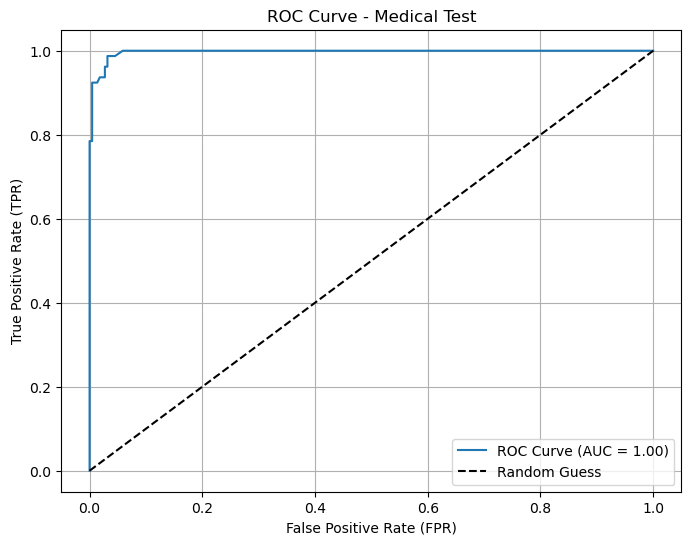

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

#. Dataset - medical test
np.random.seed(42)
n_samples = 1000
X = np.random.randn(n_samples, 2)
y = (X[:,0] + X[:,1] > 1).astype(int)

#. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

#. Build model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#. Prediction
y_proba = rf_model.predict_proba(X_test)[:,1]

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve - Medical Test")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Evaluating three models

In a real-world problem, we implement more than one model during our experiments. <br>
Therefore, we implement three different models and evaluate the performance of them using ROC curve and AUC.

For a generict binary classification data, we try to fit it with the following models:
- Logistic Regression
- Random Forest, and
- XGBoost

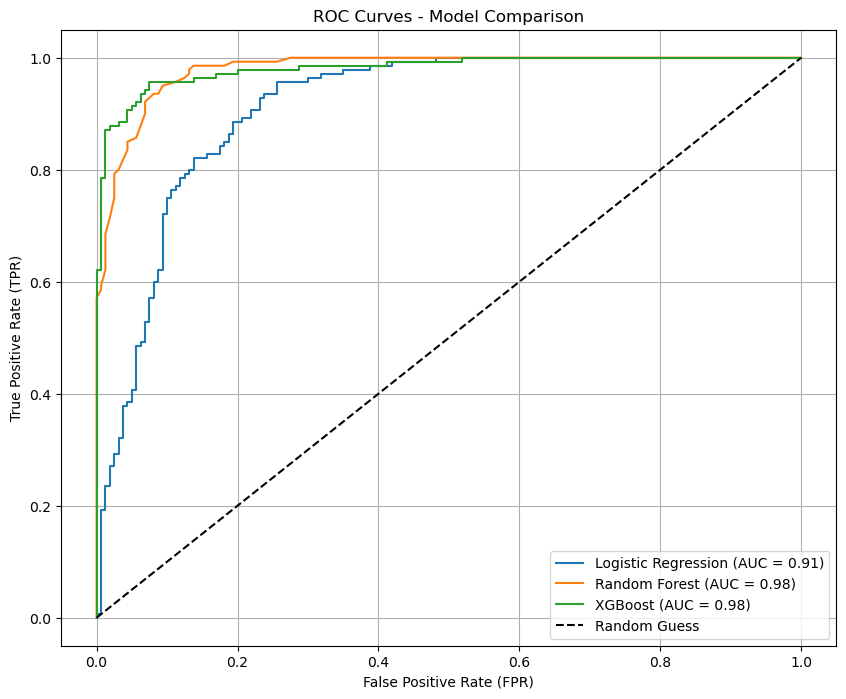

In [87]:
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#. Dataset - binary clf
X, y = make_classification(
    n_samples=1000, n_features=20, 
    n_informative=10, n_redundant=5, 
    random_state=42)

#. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# List models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
}

#. Create figure
plt.figure(figsize=(10, 8))

#. Build models...
built_models = {}
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    built_models[model_name] = model
    
    # Prediction (probabilities)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = { round(roc_auc,2) })")

# Plot results
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curves - Model Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


**REMARKS**:
- XGboost and Random Forest have the same AUC. Then, we should compare metrics like **precision**, **recall**, or **f1-score**.
- Thus, let's find out which model has the best performance.

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

#. Select two models and 
#.   get the predict probability of positive class
model1 = built_models["Random Forest"]
y_prob_model1 = model1.predict_proba(X_test)[:, 1]
model2 = built_models["XGBoost"]
y_prob_model2 = model2.predict_proba(X_test)[:, 1]

#. Set a threshold
threshold = 0.5
y_pred_model1 = (y_prob_model1 >= threshold).astype(int)
y_pred_model2 = (y_prob_model2 >= threshold).astype(int)

#. Model 01: Random Forest:
# Compute metrics: precision, recall and f1-score
precision_model1 = precision_score(y_test, y_pred_model1)
recall_model1 = recall_score(y_test, y_pred_model1)
f1_model1 = f1_score(y_test, y_pred_model1)

#. Model 02: Random Forest:
# Compute metrics: precision, recall and f1-score
precision_model2 = precision_score(y_test, y_pred_model2)
recall_model2 = recall_score(y_test, y_pred_model2)
f1_model2 = f1_score(y_test, y_pred_model2)

print(f"Model 1: Precision={precision_model1},"+ \
      f"Recall={recall_model1}, F1={f1_model1}")
print(f"Model 2: Precision={precision_model2}," + \
      f"Recall={recall_model2}, F1={f1_model2}")


Model 1: Precision=0.8662420382165605,Recall=0.9714285714285714, F1=0.9158249158249159
Model 2: Precision=0.9115646258503401,Recall=0.9571428571428572, F1=0.9337979094076655


**REMARKS**:
- It seems **XGBoost** (model 2) performs a bit better than **Random Forest** (model 1) - check f1-score.